We continue our adventure in the Bayesian USA 2016 election forecast through near-ignorance priors.

I will today show how to compute the lower and upepr probabilities for Clinton of winning the general election 2016.
First, we load the lower and upper probabilities for Clinton of winning in every single State (see http://idpstat.blogspot.ch/2016/08/bayesian-winning-lower-and-upper.html) as well as the Electoral Vore for each state


In [12]:
import pandas as pd
lowerupper     = pd.read_csv('LowerUpper.csv')
electoralvotes = pd.read_csv('electoralvotes.csv')

In [13]:
#lowerupper

In [14]:
#electoralvotes

We compute two histograms: one relative to the lower probability and the other relative to the upper probability.
To obtain the histogram of the lower: for each State, we generate a random number r in [0,1] and we assign the electoral vote of the State to Clinton if $r \leq LowerProbability$ in the State or to Trump otherwise.
(same for the upper).  We also compute the lower and upper probability that the total electoral votes for Clinton exceeds the break-even line (that is equal to 269)

In [15]:
import numpy as np
#break-even line
evenline=269
#monte Carlo samples
Np=10000

lowvotes=0
upvotes=0
LowElec=np.zeros(Np)
UpElec=np.zeros(Np)
for i in range(0,Np):
    lowElec=0
    upElec=0
    for s in range(0,51):
        if np.random.rand(1)<lowerupper['LowerProbability'][s]:
            lowElec=lowElec+electoralvotes['Vote'][s]
        if np.random.rand(1)<lowerupper['UpperProbability'][s]:
            upElec=upElec+electoralvotes['Vote'][s]
    LowElec[i]=lowElec
    UpElec[i]=upElec
    if lowElec>evenline:
        lowvotes=lowvotes+1
    if upElec>evenline:
        upvotes=upvotes+1
    
upvotes=upvotes/Np
lowvotes=lowvotes/Np
print('['+str(lowvotes) +',' +str(upvotes)+']')

[1.0,1.0]


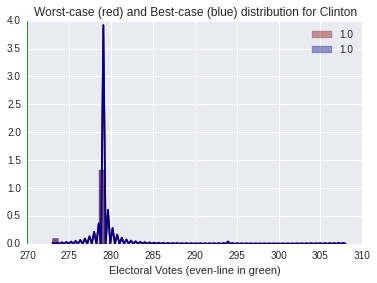

In [17]:
import warnings
import datetime as datetime
warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(LowElec, axlabel="Electoral Votes (even-line in green)", 
                 kde=True, hist=True,color='darkred',label=str(lowvotes)) 
go=sns.distplot(UpElec, 
                 kde=True, hist=True,color='darkblue',label=str(upvotes)) 

go.set_title('Worst-case (red) and Best-case (blue) distribution for Clinton')
go.legend()
plt.axvline(x=270.,color='g')
#plt.xlim(200,450)
plt.savefig('General' + str(datetime.date.today())+'.png')